In [6]:
cd "C:\碩二上\心理與神經資訊學\computer-vision-realtjr\Taiwanese"

C:\碩二上\心理與神經資訊學\computer-vision-realtjr\Taiwanese


In [7]:
import pandas as pd
import os

# 讀取情緒標籤
df = pd.read_excel("Image_info.xls")

# 移除無標籤資料
df = df.dropna(subset=["maxIntCategory"])

# 設定 ground truth 標籤（1~6）
df["gt"] = df["maxIntCategory"].astype(int)

df.head()


,file_name,Self_evaluate,Observer_Count,maxIntCategory,maxInt,EntropyVal,counterMax,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,intVal,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,gt
1,0101a02.tif,NaN,100.0,1.0,0.62,1.58,0.59,0.04,0.14,0.22,...,0.48,0,0.07,0.28,0.15,0.45,0.62,0.05,0.07,1
2,0101a05.tif,NaN,100.0,1.0,0.72,1.72,0.56,0.06,0.13,0.24,...,0.49,0.07,0.07,0.26,0.23,0.38,0.72,0.1,0.01,1
3,0101a06.tif,NaN,100.0,1.0,0.97,1.99,0.4,0.15,0.14,0.29,...,0.52,0.07,0.07,0.14,0.47,0.5,0.97,0.1,0.04,1
4,0111b01.tif,8.5,100.0,1.0,5.02,1.59,0.97,0,0,0,...,0.52,0.07,0.15,5.02,0.02,0.02,0.02,0.03,0.5,1
5,0111b02.tif,8.5,100.0,1.0,4.43,1.60,0.96,0,0,0,...,0.52,0.07,0.15,4.43,0.02,0.03,0.04,0.04,0.4,1


In [4]:
emotion_map = {
    "happy": 1,
    "sad": 2,
    "angry": 3,
    "disgust": 4,
    "fear": 5,
    "surprise": 6,
    "neutral": 0   # dataset 中沒有 neutral → 當作模型失敗或不確定
}


In [8]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm

df = pd.read_excel("Image_info.xls")
df = df.dropna(subset=["maxIntCategory"])
df["gt"] = df["maxIntCategory"].astype(int)

df["file_name"] = df["file_name"].str.replace(".tif", ".jpg")

emotion_map = {
    "happy": 1,
    "sad": 2,
    "angry": 3,
    "disgust": 4,
    "fear": 5,
    "surprise": 6,
    "neutral": 0
}

pred_list = []

for fname in tqdm(df["file_name"]):
    img_path = os.path.join("faces_256x256", fname)

    try:
        result = DeepFace.analyze(
            img_path,
            actions=["emotion"],
            enforce_detection=False
        )

        # ⭐ 新版 DeepFace 回傳 list，要取第一個項目
        if isinstance(result, list):
            result = result[0]

        emo = result["dominant_emotion"]
        print(fname, "→", emo)
        pred = emotion_map.get(emo, -1)

    except Exception as e:
        print("Error on", fname, e)
        pred = -1

    pred_list.append(pred)

df["pred"] = pred_list


  0%|          | 6/2272 [00:00<01:25, 26.55it/s]

0101a02.jpg → happy
0101a05.jpg → happy
0101a06.jpg → sad
0111b01.jpg → happy
0111b02.jpg → happy
0111b03.jpg → happy


  1%|          | 12/2272 [00:00<01:22, 27.38it/s]

0111b05.jpg → happy
0111b06.jpg → happy
0111c03.jpg → neutral
0111c06.jpg → happy
0111d02.jpg → happy
0111d03.jpg → neutral
0111e02.jpg → happy


  1%|          | 18/2272 [00:00<01:28, 25.41it/s]

0111e03.jpg → sad
0111e04.jpg → happy
0111f01.jpg → sad
0111f02.jpg → happy
0111f03.jpg → happy
0111g03.jpg → neutral


  1%|          | 24/2272 [00:00<01:31, 24.63it/s]

0111g04.jpg → happy
0121b01.jpg → happy
0121b02.jpg → happy
0121b03.jpg → happy
0121c01.jpg → neutral
0121c02.jpg → neutral


  1%|▏         | 30/2272 [00:01<01:27, 25.77it/s]

0121c03.jpg → neutral
0121d02.jpg → neutral
0121d03.jpg → neutral
0121e01.jpg → sad
0121e02.jpg → sad
0121e04.jpg → sad


  2%|▏         | 36/2272 [00:01<01:32, 24.08it/s]

0121f01.jpg → neutral
0121f03.jpg → neutral
0121f05.jpg → neutral
0121g01.jpg → happy
0121g04.jpg → happy


  2%|▏         | 42/2272 [00:01<01:26, 25.66it/s]

0131c01.jpg → happy
0131c02.jpg → neutral
0131d01.jpg → happy
0131e02.jpg → happy
0131e03.jpg → neutral
0131e04.jpg → happy


  2%|▏         | 48/2272 [00:01<01:25, 26.05it/s]

0131f01.jpg → neutral
0131f03.jpg → neutral
0131f05.jpg → neutral
0131g04.jpg → happy
0201a09.jpg → neutral
0201a11.jpg → neutral


  2%|▏         | 55/2272 [00:02<01:20, 27.68it/s]

0201a16.jpg → neutral
0211b02.jpg → happy
0211b07.jpg → happy
0211c12.jpg → sad
0211c14.jpg → sad
0211c16.jpg → angry
0211d20.jpg → sad


  3%|▎         | 61/2272 [00:02<01:17, 28.52it/s]

0211d21.jpg → sad
0211d22.jpg → sad
0211e11.jpg → disgust
0211e12.jpg → angry
0211e14.jpg → sad
0211f09.jpg → neutral
0211f10.jpg → angry


  3%|▎         | 68/2272 [00:02<01:14, 29.76it/s]

0211f11.jpg → neutral
0211g07.jpg → angry
0221b01.jpg → happy
0221b04.jpg → happy
0221b05.jpg → happy
0221c01.jpg → sad
0221c05.jpg → angry


  3%|▎         | 72/2272 [00:02<01:14, 29.63it/s]

0221c08.jpg → angry
0221d03.jpg → angry
0221d10.jpg → angry
0221d15.jpg → fear
0221e01.jpg → angry
0221e03.jpg → angry


  3%|▎         | 79/2272 [00:02<01:16, 28.66it/s]

0221e12.jpg → angry
0221f15.jpg → neutral
0221f16.jpg → neutral
0221f18.jpg → neutral
0221g07.jpg → surprise


  4%|▎         | 85/2272 [00:03<01:20, 27.23it/s]

0221g08.jpg → surprise
0221g09.jpg → neutral
0231b02.jpg → happy
0231b04.jpg → happy
0231b05.jpg → happy
0231c01.jpg → angry


  4%|▍         | 91/2272 [00:03<01:19, 27.48it/s]

0231c09.jpg → angry
0231c17.jpg → angry
0231d09.jpg → neutral
0231d17.jpg → neutral
0231d18.jpg → neutral
0231e15.jpg → angry


  4%|▍         | 97/2272 [00:03<01:17, 28.17it/s]

0231e16.jpg → angry
0231e19.jpg → angry
0231f02.jpg → angry
0231f07.jpg → angry
0231f13.jpg → angry
0231g02.jpg → neutral
0231g03.jpg → surprise


  5%|▍         | 103/2272 [00:03<01:25, 25.48it/s]

0231g04.jpg → surprise
0301a01.jpg → neutral
0301a02.jpg → neutral
0301a04.jpg → neutral
0311b03.jpg → happy


  5%|▍         | 109/2272 [00:04<01:23, 25.90it/s]

0311b05.jpg → happy
0311b09.jpg → happy
0311c01.jpg → angry
0311c03.jpg → angry
0311c11.jpg → angry
0311d11.jpg → neutral


  5%|▌         | 115/2272 [00:04<01:21, 26.61it/s]

0311d12.jpg → neutral
0311d13.jpg → neutral
0311e11.jpg → sad
0311e12.jpg → neutral
0311e13.jpg → angry
0311f02.jpg → disgust


  5%|▌         | 121/2272 [00:04<01:24, 25.41it/s]

0311f09.jpg → neutral
0311f12.jpg → neutral
0311g04.jpg → neutral
0311g05.jpg → angry
0311g07.jpg → angry
0321b04.jpg → happy


  6%|▌         | 128/2272 [00:04<01:19, 26.81it/s]

0321b07.jpg → happy
0321b10.jpg → happy
0321c22.jpg → sad
0321c23.jpg → angry
0321c28.jpg → fear
0321d11.jpg → sad


  6%|▌         | 131/2272 [00:04<01:22, 26.11it/s]

0321d12.jpg → sad
0321d14.jpg → angry
0321e08.jpg → angry
0321f01.jpg → sad
0321f02.jpg → angry


  6%|▌         | 137/2272 [00:05<01:24, 25.38it/s]

0321f06.jpg → disgust
0321g01.jpg → happy
0321g03.jpg → happy
0321g07.jpg → fear
0331b10.jpg → happy
0331b11.jpg → happy
0331b12.jpg → happy


  6%|▋         | 144/2272 [00:05<01:18, 27.09it/s]

0331c02.jpg → angry
0331c03.jpg → sad
0331c05.jpg → angry
0331d05.jpg → disgust
0331d06.jpg → disgust
0331d07.jpg → sad


  7%|▋         | 150/2272 [00:05<01:19, 26.79it/s]

0331e03.jpg → angry
0331e07.jpg → angry
0331e09.jpg → disgust
0331f04.jpg → angry
0331f05.jpg → angry
0331f10.jpg → neutral


  7%|▋         | 156/2272 [00:05<01:21, 25.94it/s]

0331g05.jpg → neutral
0501a02.jpg → neutral
0501a03.jpg → neutral
0501a05.jpg → neutral
0511b02.jpg → happy
0511b03.jpg → happy


  7%|▋         | 162/2272 [00:06<01:22, 25.61it/s]

0511b13.jpg → happy
0511c07.jpg → sad
0511c15.jpg → sad
0511c16.jpg → sad
0511d12.jpg → angry
0511d13.jpg → angry


  7%|▋         | 168/2272 [00:06<01:20, 26.21it/s]

0511d18.jpg → angry
0511e13.jpg → neutral
0511f07.jpg → neutral
0511g10.jpg → fear
0521b01.jpg → happy
0521b03.jpg → happy


  8%|▊         | 174/2272 [00:06<01:20, 26.14it/s]

0521b09.jpg → fear
0521c01.jpg → sad
0521c02.jpg → sad
0521c13.jpg → sad
0521d07.jpg → sad
0521d12.jpg → sad


  8%|▊         | 180/2272 [00:06<01:21, 25.74it/s]

0521d13.jpg → sad
0521e14.jpg → angry
0521f10.jpg → sad
0521g01.jpg → neutral
0521g02.jpg → neutral
0521g04.jpg → neutral


  8%|▊         | 186/2272 [00:07<01:19, 26.09it/s]

0531b02.jpg → happy
0531b15.jpg → happy
0531c01.jpg → neutral
0531d05.jpg → angry
0531d19.jpg → angry
0531e12.jpg → sad


  8%|▊         | 192/2272 [00:07<01:19, 26.14it/s]

0531e13.jpg → sad
0531e15.jpg → sad
0531f11.jpg → sad
0531g08.jpg → sad
0601a01.jpg → neutral
0601a02.jpg → neutral


  9%|▊         | 198/2272 [00:07<01:20, 25.82it/s]

0601a03.jpg → neutral
0611b09.jpg → happy
0611b26.jpg → happy
0611b32.jpg → happy
0611c03.jpg → neutral
0611c07.jpg → happy


  9%|▉         | 204/2272 [00:07<01:22, 24.97it/s]

0611d39.jpg → neutral
0611e03.jpg → angry
0611e06.jpg → neutral
0611f01.jpg → neutral
0611g01.jpg → angry


  9%|▉         | 207/2272 [00:07<01:29, 23.12it/s]

0611g02.jpg → fear
0611g31.jpg → neutral
0621b01.jpg → happy
0621b05.jpg → happy
0621b06.jpg → happy


  9%|▉         | 213/2272 [00:08<01:29, 23.10it/s]

0621c05.jpg → neutral
0621c06.jpg → neutral
0621c07.jpg → neutral
0621d08.jpg → neutral
0621d17.jpg → neutral


 10%|▉         | 219/2272 [00:08<01:26, 23.65it/s]

0621d18.jpg → neutral
0621e03.jpg → sad
0621e07.jpg → angry
0621e12.jpg → neutral
0621f04.jpg → happy


 10%|▉         | 222/2272 [00:08<01:30, 22.68it/s]

0621f05.jpg → neutral
0621f06.jpg → neutral
0621g03.jpg → surprise
0621g07.jpg → surprise


 10%|█         | 228/2272 [00:08<01:41, 20.15it/s]

0621g08.jpg → surprise
0631b02.jpg → happy
0631b06.jpg → happy
0631b11.jpg → happy


 10%|█         | 231/2272 [00:09<01:36, 21.16it/s]

0631c04.jpg → happy
0631c07.jpg → happy
0631c08.jpg → neutral
0631d17.jpg → neutral
0631e01.jpg → neutral


 10%|█         | 237/2272 [00:09<01:33, 21.76it/s]

0631f11.jpg → neutral
0631g01.jpg → angry
0631g11.jpg → fear
0631g14.jpg → surprise
0701a01.jpg → neutral


 11%|█         | 243/2272 [00:09<01:29, 22.63it/s]

0701a02.jpg → neutral
0701a03.jpg → neutral
0711b01.jpg → happy
0711b02.jpg → happy
0711b03.jpg → happy


 11%|█         | 249/2272 [00:09<01:23, 24.16it/s]

0711c13.jpg → sad
0711c19.jpg → neutral
0711c32.jpg → fear
0711d10.jpg → angry
0711d14.jpg → angry
0711e16.jpg → neutral


 11%|█         | 252/2272 [00:09<01:23, 24.24it/s]

0711e17.jpg → happy
0711e21.jpg → fear
0711f08.jpg → angry
0711g02.jpg → neutral
0711g19.jpg → surprise


 11%|█▏        | 258/2272 [00:10<01:23, 24.25it/s]

0721b04.jpg → happy
0721b05.jpg → happy
0721b06.jpg → happy
0721c01.jpg → fear
0721c03.jpg → fear
0721c07.jpg → neutral


 12%|█▏        | 264/2272 [00:10<01:18, 25.65it/s]

0721d07.jpg → angry
0721d08.jpg → angry
0721d12.jpg → angry
0721e01.jpg → angry
0721e06.jpg → angry
0721e11.jpg → angry


 12%|█▏        | 270/2272 [00:10<01:24, 23.71it/s]

0721f04.jpg → fear
0721f09.jpg → fear
0721f10.jpg → neutral
0721g03.jpg → surprise
0721g04.jpg → surprise


 12%|█▏        | 276/2272 [00:10<01:23, 23.88it/s]

0721g05.jpg → neutral
0731b01.jpg → happy
0731b04.jpg → happy
0731b05.jpg → happy
0731c12.jpg → fear


 12%|█▏        | 279/2272 [00:11<01:22, 24.28it/s]

0731c15.jpg → sad
0731c17.jpg → sad
0731d09.jpg → neutral
0731e07.jpg → sad
0731f12.jpg → fear


 13%|█▎        | 285/2272 [00:11<01:25, 23.14it/s]

0731f13.jpg → surprise
0731g03.jpg → sad
0731g15.jpg → sad
2901a04.jpg → neutral
2901a16.jpg → neutral


 13%|█▎        | 291/2272 [00:11<01:22, 24.14it/s]

2911b02.jpg → happy
2911b07.jpg → happy
2911c16.jpg → neutral
2911c22.jpg → sad
2911d13.jpg → neutral
2911d15.jpg → neutral


 13%|█▎        | 297/2272 [00:11<01:20, 24.44it/s]

2911e14.jpg → neutral
2911e15.jpg → happy
2911f01.jpg → sad
2911f05.jpg → sad
2921b11.jpg → happy
2921b14.jpg → happy


 13%|█▎        | 303/2272 [00:11<01:19, 24.75it/s]

2921c08.jpg → angry
2921c17.jpg → angry
2921d12.jpg → angry
2921d16.jpg → neutral
2921e06.jpg → disgust
2921e07.jpg → disgust


 14%|█▎        | 309/2272 [00:12<01:23, 23.39it/s]

2921f07.jpg → neutral
2921f08.jpg → angry
2921g07.jpg → fear
2921g14.jpg → happy
0801a02.jpg → neutral


 14%|█▍        | 315/2272 [00:12<01:20, 24.37it/s]

0801a05.jpg → neutral
0801a08.jpg → neutral
0811b05.jpg → happy
0811b09.jpg → happy
0811b10.jpg → happy
0811c03.jpg → neutral


 14%|█▍        | 318/2272 [00:12<01:20, 24.12it/s]

0811c07.jpg → neutral
0811c09.jpg → neutral
0811d04.jpg → angry
0811d13.jpg → angry
0811d26.jpg → neutral


 14%|█▍        | 324/2272 [00:12<01:17, 25.05it/s]

0811e31.jpg → angry
0811f06.jpg → happy
0811f23.jpg → angry
0811f24.jpg → angry
0811g01.jpg → surprise
0811g02.jpg → surprise


 15%|█▍        | 330/2272 [00:13<01:17, 25.07it/s]

0811g20.jpg → fear
0821b07.jpg → happy
0821b10.jpg → happy
0821b11.jpg → happy
0821c01.jpg → neutral


 15%|█▍        | 336/2272 [00:13<01:18, 24.74it/s]

0821c07.jpg → sad
0821c09.jpg → neutral
0821d05.jpg → angry
0821d06.jpg → angry
0821d08.jpg → angry
0821e13.jpg → angry


 15%|█▌        | 342/2272 [00:13<01:17, 24.79it/s]

0821e14.jpg → angry
0821e15.jpg → angry
0821f13.jpg → neutral
0821g01.jpg → neutral
0821g02.jpg → neutral
0821g09.jpg → neutral


 15%|█▌        | 348/2272 [00:13<01:21, 23.62it/s]

0831b03.jpg → happy
0831b06.jpg → happy
0831b08.jpg → happy
0831c15.jpg → neutral
0831d13.jpg → neutral


 15%|█▌        | 351/2272 [00:13<01:21, 23.45it/s]

0831d14.jpg → neutral
0831d15.jpg → neutral
0831e16.jpg → angry
0831f05.jpg → fear
0831f10.jpg → neutral


 16%|█▌        | 357/2272 [00:14<01:24, 22.64it/s]

0831f11.jpg → neutral
0831g01.jpg → neutral
0831g08.jpg → surprise
0831g22.jpg → surprise
0901a10.jpg → neutral


 16%|█▌        | 363/2272 [00:14<01:23, 22.94it/s]

0901a11.jpg → neutral
0901a12.jpg → neutral
0911b09.jpg → neutral
0911c09.jpg → sad
0911d10.jpg → angry


 16%|█▌        | 366/2272 [00:14<01:22, 23.10it/s]

0911e04.jpg → happy
0911e09.jpg → angry
0911e11.jpg → neutral
0911f10.jpg → neutral
0911g15.jpg → surprise


 16%|█▋        | 372/2272 [00:14<01:19, 23.80it/s]

0911g16.jpg → surprise
0921b09.jpg → happy
0921b10.jpg → happy
0921b11.jpg → happy
0921c04.jpg → angry
0921c06.jpg → sad


 17%|█▋        | 378/2272 [00:15<01:15, 24.92it/s]

0921c07.jpg → sad
0921d16.jpg → angry
0921d17.jpg → angry
0921d18.jpg → angry
0921e11.jpg → angry
0921e14.jpg → angry


 17%|█▋        | 384/2272 [00:15<01:17, 24.22it/s]

0921e18.jpg → angry
0921f10.jpg → neutral
0921g01.jpg → surprise
0921g03.jpg → surprise
0921g05.jpg → surprise


 17%|█▋        | 390/2272 [00:15<01:17, 24.40it/s]

0931b08.jpg → happy
0931b11.jpg → happy
0931c10.jpg → sad
0931d09.jpg → neutral
0931e05.jpg → sad
0931f04.jpg → neutral


 17%|█▋        | 396/2272 [00:15<01:16, 24.44it/s]

0931g04.jpg → neutral
1001a02.jpg → neutral
1001a03.jpg → neutral
1001a04.jpg → neutral
1011b02.jpg → happy
1011b05.jpg → happy


 18%|█▊        | 402/2272 [00:16<01:13, 25.55it/s]

1011b06.jpg → happy
1011c12.jpg → angry
1011c13.jpg → angry
1011c14.jpg → sad
1011d01.jpg → neutral
1011d02.jpg → neutral


 18%|█▊        | 408/2272 [00:16<01:13, 25.28it/s]

1011e01.jpg → sad
1011f04.jpg → neutral
1011g14.jpg → neutral
1011g15.jpg → neutral
1011g16.jpg → surprise
1021b06.jpg → happy


 18%|█▊        | 414/2272 [00:16<01:09, 26.70it/s]

1021b07.jpg → happy
1021b10.jpg → happy
1021c09.jpg → sad
1021c10.jpg → angry
1021c11.jpg → sad
1021d02.jpg → neutral


 18%|█▊        | 420/2272 [00:16<01:10, 26.26it/s]

1021d04.jpg → sad
1021d05.jpg → sad
1021e02.jpg → angry
1021e08.jpg → angry
1021e11.jpg → angry
1021f10.jpg → happy


 19%|█▉        | 426/2272 [00:17<01:14, 24.92it/s]

1021f11.jpg → happy
1021f12.jpg → happy
1021g01.jpg → surprise
1021g02.jpg → surprise
1021g03.jpg → surprise


 19%|█▉        | 432/2272 [00:17<01:13, 24.87it/s]

1031b01.jpg → sad
1031b13.jpg → sad
1031b14.jpg → sad
1031c07.jpg → sad
1031d20.jpg → sad
1031e01.jpg → sad


 19%|█▉        | 435/2272 [00:17<01:21, 22.47it/s]

1031f11.jpg → neutral
1031g12.jpg → surprise
1101a01.jpg → happy
1101a02.jpg → happy
1101a03.jpg → happy


 19%|█▉        | 441/2272 [00:17<01:22, 22.20it/s]

1111b17.jpg → happy
1111b20.jpg → happy
1111b23.jpg → happy
1111c04.jpg → sad
1111c10.jpg → sad
1111c13.jpg → neutral


 20%|█▉        | 447/2272 [00:17<01:20, 22.72it/s]

1111d05.jpg → angry
1111d29.jpg → happy
1111d30.jpg → angry
1111e01.jpg → happy
1111e05.jpg → sad


 20%|█▉        | 453/2272 [00:18<01:22, 22.16it/s]

1111e06.jpg → sad
1111f04.jpg → neutral
1111g10.jpg → neutral
1121b03.jpg → happy
1121b06.jpg → happy


 20%|██        | 456/2272 [00:18<01:21, 22.26it/s]

1121b10.jpg → happy
1121c02.jpg → angry
1121c03.jpg → sad
1121c04.jpg → angry
1121d03.jpg → happy


 20%|██        | 462/2272 [00:18<01:16, 23.70it/s]

1121d10.jpg → angry
1121d18.jpg → angry
1121e01.jpg → neutral
1121e03.jpg → angry
1121e05.jpg → angry


 20%|██        | 465/2272 [00:18<01:19, 22.68it/s]

1121f02.jpg → happy
1121f03.jpg → happy
1121f04.jpg → happy
1121g01.jpg → neutral


 21%|██        | 471/2272 [00:19<01:24, 21.19it/s]

1121g03.jpg → neutral
1121g05.jpg → neutral
1131b01.jpg → happy
1131b02.jpg → happy


 21%|██        | 474/2272 [00:19<01:24, 21.27it/s]

1131b06.jpg → happy
1131c08.jpg → neutral
1131d07.jpg → neutral
1131d16.jpg → neutral
1131d17.jpg → neutral


 21%|██        | 480/2272 [00:19<01:25, 20.96it/s]

1131e04.jpg → angry
1131e05.jpg → angry
1131e13.jpg → happy
1131f14.jpg → sad
1131f15.jpg → neutral


 22%|██▏       | 489/2272 [00:19<01:04, 27.73it/s]

1131f16.jpg → angry
1131g05.jpg → neutral
Error on 1201a02.jpg Confirm that faces_256x256\1201a02.jpg exists
Error on 1201a09.jpg Confirm that faces_256x256\1201a09.jpg exists
Error on 1201a10.jpg Confirm that faces_256x256\1201a10.jpg exists
1211b04.jpg → happy
1211b07.jpg → neutral
1211b10.jpg → happy


 22%|██▏       | 492/2272 [00:19<01:09, 25.68it/s]

1211c14.jpg → fear
1211c15.jpg → neutral
1211c22.jpg → neutral
1211d12.jpg → angry
1211d13.jpg → neutral


 22%|██▏       | 498/2272 [00:20<01:15, 23.49it/s]

1211d14.jpg → neutral
1211e01.jpg → angry
1211f05.jpg → sad
1211g04.jpg → neutral
1211g21.jpg → happy


 22%|██▏       | 504/2272 [00:20<01:18, 22.51it/s]

1221b02.jpg → happy
1221b03.jpg → happy
1221b05.jpg → happy
1221c10.jpg → neutral
1221d03.jpg → neutral


 22%|██▏       | 507/2272 [00:20<01:19, 22.24it/s]

1221d05.jpg → happy
1221d08.jpg → neutral
1221e07.jpg → happy
1221e09.jpg → fear
1221e17.jpg → neutral


 23%|██▎       | 513/2272 [00:20<01:22, 21.37it/s]

1221f04.jpg → surprise
1221g13.jpg → neutral
1221g20.jpg → surprise
1221g30.jpg → neutral
1231b02.jpg → happy


 23%|██▎       | 519/2272 [00:21<01:20, 21.89it/s]

1231b08.jpg → happy
1231b11.jpg → happy
1231c03.jpg → sad
1231d05.jpg → happy
1231d16.jpg → neutral


 23%|██▎       | 522/2272 [00:21<01:20, 21.78it/s]

1231e01.jpg → neutral
1231f01.jpg → neutral
1231g13.jpg → neutral
Error on 1301a01.jpg Confirm that faces_256x256\1301a01.jpg exists
Error on 1301a02.jpg Confirm that faces_256x256\1301a02.jpg exists
Error on 1301a03.jpg Confirm that faces_256x256\1301a03.jpg exists
1311b01.jpg → happy
1311b02.jpg → happy


 23%|██▎       | 531/2272 [00:21<01:05, 26.67it/s]

1311b03.jpg → happy
1311c02.jpg → neutral
1311c03.jpg → neutral
1311d02.jpg → sad
1311e16.jpg → angry
1311e17.jpg → angry


 24%|██▎       | 537/2272 [00:21<01:10, 24.76it/s]

1311e18.jpg → angry
1311f13.jpg → fear
1311g04.jpg → sad
1321b01.jpg → happy
1321b02.jpg → happy


 24%|██▍       | 543/2272 [00:22<01:13, 23.42it/s]

1321b03.jpg → happy
1321c17.jpg → angry
1321c18.jpg → fear
1321c19.jpg → angry
1321d11.jpg → angry


 24%|██▍       | 546/2272 [00:22<01:13, 23.36it/s]

1321d12.jpg → angry
1321d13.jpg → angry
1321e09.jpg → angry
1321e12.jpg → angry
1321e14.jpg → angry


 24%|██▍       | 552/2272 [00:22<01:20, 21.24it/s]

1321f05.jpg → neutral
1321g01.jpg → neutral
1321g02.jpg → neutral
1321g03.jpg → neutral
1331b04.jpg → happy


 25%|██▍       | 558/2272 [00:22<01:19, 21.61it/s]

1331b06.jpg → happy
1331b12.jpg → happy
1331c05.jpg → neutral
1331d05.jpg → neutral
1331d16.jpg → sad


 25%|██▍       | 561/2272 [00:22<01:18, 21.80it/s]

1331d17.jpg → neutral
1331e11.jpg → sad
1331e14.jpg → sad
1331e15.jpg → sad
1331f05.jpg → neutral


 25%|██▍       | 567/2272 [00:23<01:17, 21.87it/s]

1331g10.jpg → neutral
1401a05.jpg → neutral
1401a06.jpg → neutral
1401a17.jpg → neutral
1411b04.jpg → happy


 25%|██▌       | 573/2272 [00:23<01:16, 22.25it/s]

1411b07.jpg → happy
1411b15.jpg → happy
1411c18.jpg → angry
1411c21.jpg → angry
1411c23.jpg → angry


 25%|██▌       | 576/2272 [00:23<01:16, 22.21it/s]

1411d03.jpg → angry
1411d08.jpg → happy
1411d11.jpg → happy
1411d14.jpg → angry
1411e16.jpg → fear


 26%|██▌       | 582/2272 [00:23<01:17, 21.89it/s]

1411f03.jpg → sad
1411f04.jpg → happy
1411f14.jpg → sad
1411g05.jpg → neutral
1421b09.jpg → happy


 26%|██▌       | 588/2272 [00:24<01:16, 21.93it/s]

1421b11.jpg → happy
1421b13.jpg → happy
1421c01.jpg → neutral
1421c02.jpg → sad
1421c11.jpg → sad


 26%|██▌       | 591/2272 [00:24<01:17, 21.68it/s]

1421d01.jpg → neutral
1421d02.jpg → neutral
1421d03.jpg → neutral
1421e01.jpg → angry
1421e02.jpg → angry


 26%|██▋       | 597/2272 [00:24<01:18, 21.23it/s]

1421e15.jpg → angry
1421f05.jpg → happy
1421f09.jpg → happy
1421f10.jpg → happy
1421g10.jpg → surprise


 27%|██▋       | 603/2272 [00:24<01:15, 22.22it/s]

1421g11.jpg → surprise
1421g12.jpg → angry
1431b04.jpg → happy
1431b07.jpg → happy
1431b12.jpg → happy


 27%|██▋       | 606/2272 [00:24<01:14, 22.23it/s]

1431c14.jpg → angry
1431c15.jpg → sad
1431c20.jpg → angry
1431e09.jpg → angry
1431e12.jpg → angry


 27%|██▋       | 612/2272 [00:25<01:19, 20.95it/s]

1431e16.jpg → angry
1431f08.jpg → sad
1431g12.jpg → neutral
2911g02.jpg → fear


 27%|██▋       | 615/2272 [00:25<01:18, 21.01it/s]

2911g03.jpg → fear
2911g09.jpg → angry
2931d09.jpg → angry
2931e15.jpg → fear
1501a03.jpg → neutral


 27%|██▋       | 621/2272 [00:25<01:17, 21.18it/s]

1501a04.jpg → neutral
1501a08.jpg → neutral
1511b03.jpg → neutral
1511c08.jpg → neutral
1511d04.jpg → angry


 28%|██▊       | 627/2272 [00:26<01:20, 20.55it/s]

1511d05.jpg → angry
1511d09.jpg → angry
1511e11.jpg → neutral
1511f02.jpg → angry
1511f05.jpg → angry


 28%|██▊       | 630/2272 [00:26<01:19, 20.65it/s]

1511f08.jpg → neutral
1511g02.jpg → happy
1521b02.jpg → happy
1521b08.jpg → happy
1521b09.jpg → happy


 28%|██▊       | 636/2272 [00:26<01:21, 20.16it/s]

1521c07.jpg → neutral
1521c12.jpg → neutral
1521c15.jpg → neutral
1521d02.jpg → angry


 28%|██▊       | 639/2272 [00:26<01:20, 20.18it/s]

1521d07.jpg → angry
1521d08.jpg → angry
1521e10.jpg → angry
1521e11.jpg → angry
1521e18.jpg → angry


 28%|██▊       | 645/2272 [00:26<01:20, 20.23it/s]

1521f01.jpg → neutral
1521f02.jpg → surprise
1521f05.jpg → neutral
1521g08.jpg → angry
1521g09.jpg → fear


 29%|██▊       | 651/2272 [00:27<01:19, 20.49it/s]

1521g14.jpg → fear
1531b01.jpg → neutral
1531b06.jpg → neutral
1531b10.jpg → neutral
1531c02.jpg → neutral


 29%|██▉       | 654/2272 [00:27<01:20, 20.08it/s]

1531d12.jpg → angry
1531d13.jpg → angry
1531d14.jpg → angry
1531e02.jpg → angry
1531f02.jpg → sad


 29%|██▉       | 660/2272 [00:27<01:17, 20.71it/s]

1531f16.jpg → happy
1531g12.jpg → fear
1601a01.jpg → neutral
1601a02.jpg → neutral
1601a04.jpg → neutral


 29%|██▉       | 663/2272 [00:27<01:15, 21.26it/s]

1611b10.jpg → happy
1611b11.jpg → happy
1611b12.jpg → happy
1611c02.jpg → neutral


 29%|██▉       | 669/2272 [00:28<01:17, 20.59it/s]

1611d05.jpg → neutral
1611d09.jpg → neutral
1611d13.jpg → neutral
1611e19.jpg → sad
1611e20.jpg → sad


 30%|██▉       | 675/2272 [00:28<01:16, 20.94it/s]

1611e21.jpg → fear
1611f02.jpg → neutral
1611g03.jpg → happy
1611g08.jpg → neutral
1611g09.jpg → neutral


 30%|██▉       | 678/2272 [00:28<01:13, 21.58it/s]

1621b04.jpg → happy
1621b05.jpg → happy
1621b09.jpg → happy
1621c13.jpg → angry
1621c15.jpg → sad


 30%|███       | 684/2272 [00:28<01:10, 22.40it/s]

1621c19.jpg → neutral
1621d02.jpg → happy
1621e07.jpg → disgust
1621e08.jpg → disgust
1621e12.jpg → disgust


 30%|███       | 690/2272 [00:29<01:11, 22.07it/s]

1621f14.jpg → happy
1621g02.jpg → surprise
1621g03.jpg → happy
1621g06.jpg → surprise
1631b04.jpg → happy


 31%|███       | 693/2272 [00:29<01:11, 22.17it/s]

1631b06.jpg → happy
1631b11.jpg → happy
1631c03.jpg → sad
1631c04.jpg → sad
1631c11.jpg → neutral


 31%|███       | 699/2272 [00:29<01:14, 20.99it/s]

1631d02.jpg → neutral
1631e04.jpg → angry
1631e06.jpg → disgust
1631e08.jpg → happy
1631f02.jpg → neutral


 31%|███       | 705/2272 [00:29<01:13, 21.31it/s]

1631f03.jpg → neutral
1631f04.jpg → neutral
1631g03.jpg → fear
1631g04.jpg → fear
1631g05.jpg → fear


 31%|███       | 708/2272 [00:29<01:13, 21.35it/s]

1701a02.jpg → neutral
1701a03.jpg → neutral
1701a10.jpg → neutral
1711b01.jpg → happy
1711b02.jpg → happy


 31%|███▏      | 714/2272 [00:30<01:13, 21.28it/s]

1711b04.jpg → neutral
1711c04.jpg → angry
1711d01.jpg → angry
1711e15.jpg → angry
1711f01.jpg → surprise


 32%|███▏      | 720/2272 [00:30<01:10, 22.05it/s]

1711g12.jpg → fear
1711g13.jpg → fear
1721b08.jpg → happy
1721b09.jpg → happy
1721b10.jpg → happy


 32%|███▏      | 723/2272 [00:30<01:07, 22.80it/s]

1721c02.jpg → neutral
1721c12.jpg → neutral
1721c16.jpg → angry
1721d01.jpg → angry
1721d05.jpg → neutral


 32%|███▏      | 729/2272 [00:30<01:12, 21.19it/s]

1721d06.jpg → neutral
1721e06.jpg → angry
1721e07.jpg → angry
1721e13.jpg → angry
1721f31.jpg → fear


 32%|███▏      | 732/2272 [00:30<01:13, 20.88it/s]

1721f32.jpg → fear
1721f35.jpg → fear
1721g10.jpg → surprise
1721g11.jpg → fear


 32%|███▏      | 738/2272 [00:31<01:15, 20.37it/s]

1721g12.jpg → fear
1731b05.jpg → neutral
1731b06.jpg → neutral
1731b16.jpg → neutral
1731c02.jpg → neutral


 33%|███▎      | 744/2272 [00:31<01:11, 21.39it/s]

1731c12.jpg → neutral
1731c14.jpg → neutral
1731d03.jpg → neutral
1731d04.jpg → neutral
1731d06.jpg → neutral


 33%|███▎      | 747/2272 [00:31<01:10, 21.61it/s]

1731e04.jpg → angry
1731e05.jpg → angry
1731e11.jpg → angry
1731f03.jpg → neutral
1731g02.jpg → fear


 33%|███▎      | 756/2272 [00:31<00:56, 26.90it/s]

1731g04.jpg → surprise
1731g06.jpg → surprise
Error on 1801a01.jpg Confirm that faces_256x256\1801a01.jpg exists
Error on 1801a04.jpg Confirm that faces_256x256\1801a04.jpg exists
Error on 1801a07.jpg Confirm that faces_256x256\1801a07.jpg exists
1811b10.jpg → neutral
1811b11.jpg → neutral
1811b12.jpg → neutral


 34%|███▎      | 762/2272 [00:32<01:03, 23.95it/s]

1811c04.jpg → neutral
1811c05.jpg → neutral
1811c06.jpg → neutral
1811d04.jpg → angry
1811e03.jpg → neutral


 34%|███▎      | 765/2272 [00:32<01:04, 23.34it/s]

1811f06.jpg → neutral
1811g05.jpg → neutral
1821b04.jpg → happy
1821b05.jpg → happy
1821b06.jpg → happy


 34%|███▍      | 771/2272 [00:32<01:03, 23.48it/s]

1821c03.jpg → angry
1821c04.jpg → angry
1821c05.jpg → neutral
1821d03.jpg → neutral
1821d07.jpg → neutral


 34%|███▍      | 777/2272 [00:32<01:03, 23.47it/s]

1821d14.jpg → neutral
1821e10.jpg → angry
1821e11.jpg → angry
1821e12.jpg → angry
1821f01.jpg → neutral


 34%|███▍      | 780/2272 [00:33<01:04, 23.13it/s]

1821g02.jpg → neutral
1821g04.jpg → neutral
1821g05.jpg → neutral
1831b07.jpg → happy
1831b09.jpg → neutral


 35%|███▍      | 786/2272 [00:33<01:05, 22.63it/s]

1831b11.jpg → neutral
1831c03.jpg → sad
1831c04.jpg → sad
1831c05.jpg → sad
1831d03.jpg → angry


 35%|███▍      | 789/2272 [00:33<01:05, 22.61it/s]

1831d04.jpg → angry
1831e01.jpg → neutral
1831f03.jpg → sad
1831g01.jpg → neutral


 35%|███▍      | 795/2272 [00:33<01:09, 21.12it/s]

1831g02.jpg → neutral
1831g03.jpg → neutral
1901a02.jpg → neutral
1901a03.jpg → neutral
1901a06.jpg → neutral


 35%|███▌      | 801/2272 [00:34<01:10, 20.88it/s]

1911b01.jpg → happy
1911c10.jpg → neutral
1911d02.jpg → neutral
1911e01.jpg → neutral
1911f01.jpg → neutral


 35%|███▌      | 804/2272 [00:34<01:11, 20.67it/s]

1911g02.jpg → happy
1921b02.jpg → happy
1921b04.jpg → happy
1921b11.jpg → happy
1921c03.jpg → angry


 36%|███▌      | 810/2272 [00:34<01:09, 21.08it/s]

1921c04.jpg → neutral
1921c06.jpg → angry
1921d01.jpg → sad
1921e08.jpg → sad
1921e09.jpg → neutral


 36%|███▌      | 816/2272 [00:34<01:08, 21.35it/s]

1921e10.jpg → neutral
1921f06.jpg → neutral
1921g02.jpg → happy
1921g04.jpg → happy
1921g07.jpg → happy


 36%|███▌      | 819/2272 [00:34<01:07, 21.51it/s]

1931b10.jpg → happy
1931b13.jpg → happy
1931b17.jpg → happy
1931c05.jpg → neutral


 36%|███▌      | 822/2272 [00:35<01:11, 20.17it/s]

1931d10.jpg → neutral
1931e03.jpg → neutral
1931f02.jpg → neutral
1931g02.jpg → happy


 36%|███▋      | 827/2272 [00:35<01:13, 19.60it/s]

2001a02.jpg → neutral
2001a04.jpg → neutral
2001a05.jpg → neutral
2011b01.jpg → neutral
2011c03.jpg → angry


 37%|███▋      | 833/2272 [00:35<01:10, 20.53it/s]

2011d01.jpg → angry
2011d07.jpg → angry
2011d08.jpg → angry
2011e10.jpg → sad
2011e12.jpg → angry


 37%|███▋      | 839/2272 [00:35<01:07, 21.24it/s]

2011e13.jpg → happy
2011f02.jpg → neutral
2011g03.jpg → happy
2021b08.jpg → happy
2021b10.jpg → happy


 37%|███▋      | 842/2272 [00:36<01:05, 21.72it/s]

2021b11.jpg → happy
2021c11.jpg → neutral
2021c16.jpg → neutral
2021c17.jpg → neutral
2021d04.jpg → angry


 37%|███▋      | 848/2272 [00:36<01:08, 20.86it/s]

2021d13.jpg → angry
2021d14.jpg → angry
2021e08.jpg → angry
2021e09.jpg → neutral
2021e10.jpg → angry


 38%|███▊      | 854/2272 [00:36<01:08, 20.84it/s]

2021f04.jpg → neutral
2021f06.jpg → surprise
2021f07.jpg → neutral
2021g01.jpg → neutral
2021g02.jpg → happy


 38%|███▊      | 857/2272 [00:36<01:07, 20.85it/s]

2021g09.jpg → happy
2031b10.jpg → happy
2031b11.jpg → happy
2031b12.jpg → happy
2031c02.jpg → neutral


 38%|███▊      | 863/2272 [00:37<01:05, 21.54it/s]

2031d03.jpg → neutral
2031d05.jpg → neutral
2031d10.jpg → neutral
2031e07.jpg → neutral
2031e10.jpg → neutral


 38%|███▊      | 869/2272 [00:37<01:05, 21.51it/s]

2031e11.jpg → sad
2031f10.jpg → angry
2031g06.jpg → happy
2101a02.jpg → neutral
2101a09.jpg → neutral


 38%|███▊      | 872/2272 [00:37<01:04, 21.78it/s]

2101a10.jpg → neutral
2111b01.jpg → happy
2111b08.jpg → happy
2111b14.jpg → happy
2111c11.jpg → neutral


 39%|███▊      | 878/2272 [00:37<01:08, 20.31it/s]

2111c12.jpg → neutral
2111d03.jpg → neutral
2111e05.jpg → neutral
2111f19.jpg → neutral


 39%|███▉      | 881/2272 [00:37<01:06, 20.85it/s]

2111g12.jpg → happy
2111g13.jpg → fear
2111g14.jpg → sad
2121b01.jpg → happy
2121b07.jpg → happy


 39%|███▉      | 887/2272 [00:38<01:05, 21.27it/s]

2121b08.jpg → happy
2121c12.jpg → sad
2121d11.jpg → neutral
2121d14.jpg → neutral
2121d15.jpg → neutral


 39%|███▉      | 893/2272 [00:38<01:03, 21.73it/s]

2121e06.jpg → disgust
2121e07.jpg → disgust
2121e17.jpg → disgust
2121f09.jpg → neutral
2121f14.jpg → neutral


 39%|███▉      | 896/2272 [00:38<01:05, 21.08it/s]

2121f15.jpg → neutral
2121g09.jpg → neutral
2121g14.jpg → neutral
2131b09.jpg → happy


 40%|███▉      | 902/2272 [00:38<01:02, 21.94it/s]

2131b10.jpg → happy
2131b12.jpg → happy
2131c06.jpg → neutral
2131c07.jpg → neutral
2131c14.jpg → neutral


 40%|███▉      | 905/2272 [00:38<01:05, 20.93it/s]

2131d05.jpg → neutral
2131d10.jpg → neutral
2131d12.jpg → neutral
2131e13.jpg → disgust


 40%|████      | 911/2272 [00:39<01:03, 21.32it/s]

2131e20.jpg → neutral
2131e22.jpg → disgust
2131f02.jpg → neutral
2131g01.jpg → happy
2931b05.jpg → happy


 40%|████      | 914/2272 [00:39<01:02, 21.58it/s]

2931b08.jpg → happy
2931c18.jpg → happy
2931e21.jpg → angry
2931e25.jpg → sad
2931f06.jpg → angry


 40%|████      | 920/2272 [00:39<01:02, 21.61it/s]

2931f09.jpg → neutral
2931g03.jpg → sad
2931g16.jpg → fear
3001a02.jpg → neutral
3001a05.jpg → neutral


 41%|████      | 923/2272 [00:39<01:04, 20.83it/s]

3021d04.jpg → neutral
3021d12.jpg → neutral
3021d13.jpg → neutral
2201a06.jpg → neutral


 41%|████      | 929/2272 [00:40<01:08, 19.51it/s]

2211b01.jpg → neutral
2211b09.jpg → neutral
2211c05.jpg → neutral
2211c08.jpg → neutral


 41%|████      | 932/2272 [00:40<01:07, 19.89it/s]

2211d08.jpg → neutral
2211d09.jpg → neutral
2211d10.jpg → neutral
2211e01.jpg → neutral
2211e15.jpg → neutral


 41%|████▏     | 938/2272 [00:40<01:06, 20.14it/s]

2211f04.jpg → neutral
2211g10.jpg → neutral
2221b06.jpg → happy
2221b10.jpg → happy
2221c15.jpg → angry


 42%|████▏     | 944/2272 [00:40<01:03, 20.79it/s]

2221c16.jpg → fear
2221d02.jpg → neutral
2221d07.jpg → neutral
2221d08.jpg → sad
2221e10.jpg → angry


 42%|████▏     | 947/2272 [00:41<01:03, 21.02it/s]

2221e11.jpg → angry
2221e12.jpg → angry
2221f01.jpg → happy
2221g03.jpg → fear
2221g04.jpg → sad


 42%|████▏     | 953/2272 [00:41<01:03, 20.83it/s]

2221g09.jpg → fear
2231b03.jpg → happy
2231b11.jpg → happy
2231c10.jpg → neutral
2231d04.jpg → neutral


 42%|████▏     | 959/2272 [00:41<01:04, 20.32it/s]

2231d12.jpg → neutral
2231e15.jpg → fear
2231e16.jpg → sad
2231f03.jpg → neutral
2231f12.jpg → neutral


 42%|████▏     | 962/2272 [00:41<01:04, 20.43it/s]

2231g12.jpg → surprise
2301a06.jpg → neutral
2311b02.jpg → happy
2311c08.jpg → angry
2311c09.jpg → angry


 43%|████▎     | 968/2272 [00:42<01:02, 20.98it/s]

2311d03.jpg → neutral
2311d05.jpg → happy
2311d06.jpg → neutral
2311e01.jpg → angry
2311e02.jpg → neutral


 43%|████▎     | 974/2272 [00:42<01:01, 21.25it/s]

2311e07.jpg → neutral
2311e08.jpg → angry
2311e09.jpg → angry
2311g04.jpg → fear
2311g14.jpg → fear


 43%|████▎     | 977/2272 [00:42<00:58, 22.03it/s]

2321b03.jpg → happy
2321b07.jpg → happy
2321c06.jpg → neutral
2321c13.jpg → neutral


 43%|████▎     | 980/2272 [00:42<00:59, 21.88it/s]

2321d09.jpg → neutral
2321d11.jpg → neutral
2321d14.jpg → neutral
2321e07.jpg → happy


 43%|████▎     | 986/2272 [00:42<01:02, 20.74it/s]

2321e08.jpg → angry
2321g01.jpg → neutral
2321g02.jpg → neutral
2321g03.jpg → neutral
2331b04.jpg → neutral


 44%|████▎     | 992/2272 [00:43<01:00, 21.29it/s]

2331b06.jpg → neutral
2331c12.jpg → neutral
2331d06.jpg → neutral
2331d07.jpg → angry
2331d08.jpg → neutral


 44%|████▍     | 995/2272 [00:43<01:01, 20.61it/s]

2331e08.jpg → neutral
2331e15.jpg → neutral
2331e16.jpg → neutral
2331g01.jpg → neutral
2401a08.jpg → neutral


 44%|████▍     | 1001/2272 [00:43<01:00, 21.12it/s]

2411b15.jpg → happy
2411b16.jpg → happy
2411c15.jpg → neutral
2411c19.jpg → sad
2411d01.jpg → neutral


 44%|████▍     | 1007/2272 [00:43<00:58, 21.60it/s]

2411d06.jpg → surprise
2411d15.jpg → angry
2411e07.jpg → angry
2411e08.jpg → angry
2411f01.jpg → neutral


 44%|████▍     | 1010/2272 [00:44<01:01, 20.51it/s]

2411f14.jpg → fear
2411g10.jpg → sad
2411g17.jpg → happy
2421b02.jpg → happy


 45%|████▍     | 1016/2272 [00:44<01:00, 20.71it/s]

2421c16.jpg → neutral
2421c17.jpg → neutral
2421d03.jpg → angry
2421d08.jpg → angry
2421d12.jpg → angry


 45%|████▍     | 1019/2272 [00:44<01:00, 20.88it/s]

2421e04.jpg → angry
2421e05.jpg → angry
2421f03.jpg → neutral
2421f14.jpg → angry
2421f15.jpg → neutral


 45%|████▌     | 1025/2272 [00:44<00:58, 21.25it/s]

2421g08.jpg → fear
2421g09.jpg → surprise
2431b09.jpg → happy
2431b12.jpg → happy
2431c12.jpg → neutral


 45%|████▌     | 1028/2272 [00:44<01:00, 20.61it/s]

2431c16.jpg → neutral
2431d09.jpg → surprise
2431d10.jpg → neutral
2431d17.jpg → surprise
2431e01.jpg → neutral


 46%|████▌     | 1034/2272 [00:45<00:58, 21.19it/s]

2431e22.jpg → neutral
2431f06.jpg → neutral
2431f08.jpg → angry
2431g03.jpg → fear
2431g08.jpg → neutral


 46%|████▌     | 1040/2272 [00:45<01:00, 20.30it/s]

2501a04.jpg → neutral
2501a05.jpg → neutral
2501a08.jpg → neutral
2511b02.jpg → happy
2511b04.jpg → happy


 46%|████▌     | 1046/2272 [00:45<00:59, 20.73it/s]

2511b06.jpg → happy
2511c02.jpg → sad
2511c05.jpg → neutral
2511c09.jpg → neutral
2511d04.jpg → angry


 46%|████▌     | 1049/2272 [00:45<00:59, 20.62it/s]

2511d08.jpg → angry
2511d09.jpg → happy
2511e02.jpg → neutral
2511f04.jpg → neutral
2511g05.jpg → neutral


 46%|████▋     | 1055/2272 [00:46<00:58, 20.70it/s]

2521b02.jpg → happy
2521b03.jpg → happy
2521b04.jpg → happy
2521c06.jpg → angry
2521c08.jpg → sad


 47%|████▋     | 1058/2272 [00:46<00:58, 20.74it/s]

2521c13.jpg → neutral
2521d12.jpg → angry
2521d13.jpg → angry
2521e01.jpg → angry
2521e03.jpg → angry


 47%|████▋     | 1064/2272 [00:46<01:01, 19.74it/s]

2521e05.jpg → angry
2521f02.jpg → happy
2521g01.jpg → neutral
2521g02.jpg → fear


 47%|████▋     | 1070/2272 [00:46<00:58, 20.38it/s]

2521g07.jpg → surprise
2531b01.jpg → happy
2531b07.jpg → happy
2531b08.jpg → happy
2531c01.jpg → angry


 47%|████▋     | 1073/2272 [00:47<00:58, 20.41it/s]

2531d08.jpg → neutral
2531e01.jpg → angry
2531f04.jpg → neutral
2531g10.jpg → surprise
2531g11.jpg → fear


 47%|████▋     | 1079/2272 [00:47<00:57, 20.75it/s]

2531g12.jpg → angry
2601a02.jpg → neutral
2611b07.jpg → happy
2611c08.jpg → neutral
2611c11.jpg → neutral


 48%|████▊     | 1085/2272 [00:47<00:56, 21.13it/s]

2611c13.jpg → angry
2611d15.jpg → sad
2611e01.jpg → angry
2611e06.jpg → angry
2611f07.jpg → sad


 48%|████▊     | 1088/2272 [00:47<00:56, 21.09it/s]

2611f12.jpg → surprise
2611g02.jpg → happy
2611g05.jpg → surprise
2621b05.jpg → happy
2621b11.jpg → happy


 48%|████▊     | 1094/2272 [00:48<00:59, 19.92it/s]

2621c04.jpg → neutral
2621c06.jpg → neutral
2621c08.jpg → neutral
2621d02.jpg → happy
2621e04.jpg → disgust


 48%|████▊     | 1100/2272 [00:48<00:57, 20.35it/s]

2621e08.jpg → angry
2621f09.jpg → sad
2621g02.jpg → fear
2621g05.jpg → fear
2631b01.jpg → happy


 49%|████▊     | 1103/2272 [00:48<00:56, 20.86it/s]

2631b08.jpg → happy
2631c11.jpg → sad
2631c12.jpg → sad
2631d04.jpg → disgust
2631e05.jpg → happy


 49%|████▉     | 1109/2272 [00:48<00:58, 19.96it/s]

2631f05.jpg → sad
2631f10.jpg → neutral
2631g03.jpg → happy
2631g08.jpg → happy
2701a01.jpg → neutral


 49%|████▉     | 1115/2272 [00:49<00:55, 20.71it/s]

2701a03.jpg → neutral
2701a04.jpg → neutral
2711b09.jpg → happy
2711c10.jpg → fear
2711c11.jpg → angry


 49%|████▉     | 1118/2272 [00:49<00:57, 19.90it/s]

2711d01.jpg → neutral
2711e08.jpg → neutral
2711e09.jpg → sad
2711e10.jpg → sad


 49%|████▉     | 1124/2272 [00:49<00:56, 20.49it/s]

2711f10.jpg → sad
2711g02.jpg → surprise
2721b02.jpg → happy
2721b08.jpg → happy
2721b09.jpg → happy


 50%|████▉     | 1127/2272 [00:49<00:53, 21.26it/s]

2721c08.jpg → sad
2721c11.jpg → sad
2721c12.jpg → neutral
2721d01.jpg → angry
2721e09.jpg → sad


 50%|████▉     | 1133/2272 [00:49<00:54, 20.77it/s]

2721e13.jpg → sad
2721e14.jpg → sad
2721f09.jpg → surprise
2721f13.jpg → neutral
2721f14.jpg → surprise


 50%|█████     | 1139/2272 [00:50<00:54, 20.77it/s]

2721g03.jpg → happy
2721g04.jpg → surprise
2721g05.jpg → fear
2731b07.jpg → fear
2731b11.jpg → happy


 50%|█████     | 1142/2272 [00:50<00:52, 21.60it/s]

2731c05.jpg → happy
2731c06.jpg → neutral
2731c07.jpg → happy
2731d05.jpg → neutral


 51%|█████     | 1148/2272 [00:50<00:55, 20.31it/s]

2731e08.jpg → sad
2731e09.jpg → angry
2731e10.jpg → neutral
2731f08.jpg → neutral
2731g15.jpg → fear


 51%|█████     | 1151/2272 [00:50<00:55, 20.14it/s]

2731g16.jpg → neutral
2731g17.jpg → neutral
2801a09.jpg → neutral
2801a10.jpg → neutral


 51%|█████     | 1157/2272 [00:51<00:53, 20.70it/s]

2801a11.jpg → neutral
2811b12.jpg → happy
2811c03.jpg → happy
2811c13.jpg → happy
2811c16.jpg → happy


 51%|█████     | 1160/2272 [00:51<00:55, 20.00it/s]

2811d07.jpg → happy
2811d08.jpg → happy
2811d14.jpg → happy
2811e12.jpg → happy


 51%|█████     | 1163/2272 [00:51<00:54, 20.30it/s]

2811e13.jpg → happy
2811e14.jpg → happy
2811f04.jpg → happy
2811g03.jpg → surprise


 51%|█████▏    | 1169/2272 [00:51<00:55, 19.88it/s]

2821b06.jpg → happy
2821b07.jpg → happy
2821b08.jpg → happy
2821c04.jpg → happy
2821c05.jpg → neutral


 52%|█████▏    | 1175/2272 [00:52<00:52, 21.06it/s]

2821c06.jpg → happy
2821d10.jpg → angry
2821d11.jpg → angry
2821d12.jpg → angry
2821e01.jpg → happy


 52%|█████▏    | 1178/2272 [00:52<00:50, 21.54it/s]

2821e07.jpg → neutral
2821e10.jpg → happy
2821f04.jpg → happy
2821f09.jpg → happy
2821f10.jpg → happy


 52%|█████▏    | 1184/2272 [00:52<00:52, 20.66it/s]

2821g01.jpg → fear
2821g02.jpg → fear
2821g03.jpg → fear
2831b02.jpg → happy


 52%|█████▏    | 1187/2272 [00:52<00:55, 19.59it/s]

2831b04.jpg → happy
2831b05.jpg → happy
2831c12.jpg → happy
2831c13.jpg → happy
2831c15.jpg → happy


 52%|█████▏    | 1192/2272 [00:52<00:57, 18.91it/s]

2831d08.jpg → happy
2831d09.jpg → happy
2831d11.jpg → happy
2831e01.jpg → happy


 53%|█████▎    | 1198/2272 [00:53<00:54, 19.63it/s]

2831e04.jpg → happy
2831f10.jpg → happy
2831f11.jpg → happy
2831g04.jpg → happy
3001a08.jpg → neutral


 53%|█████▎    | 1201/2272 [00:53<00:53, 19.96it/s]

3011b01.jpg → happy
3011b02.jpg → happy
3011b03.jpg → happy
3011c30.jpg → neutral
3011d12.jpg → neutral


 53%|█████▎    | 1207/2272 [00:53<00:53, 20.07it/s]

3011d14.jpg → neutral
3011d20.jpg → sad
3011e10.jpg → neutral
3011f16.jpg → neutral
3011f19.jpg → neutral


 53%|█████▎    | 1210/2272 [00:53<00:52, 20.11it/s]

3011f22.jpg → surprise
3011g03.jpg → sad
3021b04.jpg → happy
3021b06.jpg → happy
3021b08.jpg → happy


 54%|█████▎    | 1216/2272 [00:54<00:50, 21.03it/s]

3021c10.jpg → happy
3021c14.jpg → neutral
3021c21.jpg → angry
3021e01.jpg → sad
3021e05.jpg → sad


 54%|█████▍    | 1222/2272 [00:54<00:50, 20.81it/s]

3021f01.jpg → happy
3021g02.jpg → surprise
3021g03.jpg → sad
3021g05.jpg → sad


 54%|█████▍    | 1225/2272 [00:54<00:50, 20.85it/s]

3031b06.jpg → happy
3031b07.jpg → happy
3031b09.jpg → happy
3031c06.jpg → neutral


 54%|█████▍    | 1231/2272 [00:54<00:51, 20.35it/s]

3031d09.jpg → neutral
3031d11.jpg → neutral
3031d12.jpg → neutral
3031e03.jpg → happy
3031f06.jpg → neutral


100%|██████████| 2272/2272 [00:54<00:00, 41.39it/s]

3031g10.jpg → happy
Error on 0302a02.jpg Confirm that faces_256x256\0302a02.jpg exists
Error on 0312b03.jpg Confirm that faces_256x256\0312b03.jpg exists
Error on 0312c01.jpg Confirm that faces_256x256\0312c01.jpg exists
Error on 0312d02.jpg Confirm that faces_256x256\0312d02.jpg exists
Error on 0312e14.jpg Confirm that faces_256x256\0312e14.jpg exists
Error on 0312f01.jpg Confirm that faces_256x256\0312f01.jpg exists
Error on 0312g03.jpg Confirm that faces_256x256\0312g03.jpg exists
Error on 0322b01.jpg Confirm that faces_256x256\0322b01.jpg exists
Error on 0322c96.jpg Confirm that faces_256x256\0322c96.jpg exists
Error on 0322d13.jpg Confirm that faces_256x256\0322d13.jpg exists
Error on 0322f25.jpg Confirm that faces_256x256\0322f25.jpg exists
Error on 0322g29.jpg Confirm that faces_256x256\0322g29.jpg exists
Error on 0332b02.jpg Confirm that faces_256x256\0332b02.jpg exists
Error on 0332c01.jpg Confirm that faces_256x256\0332c01.jpg exists
Error on 0332d17.jpg Confirm that faces_25

Accuracy = 0.5242839352428393


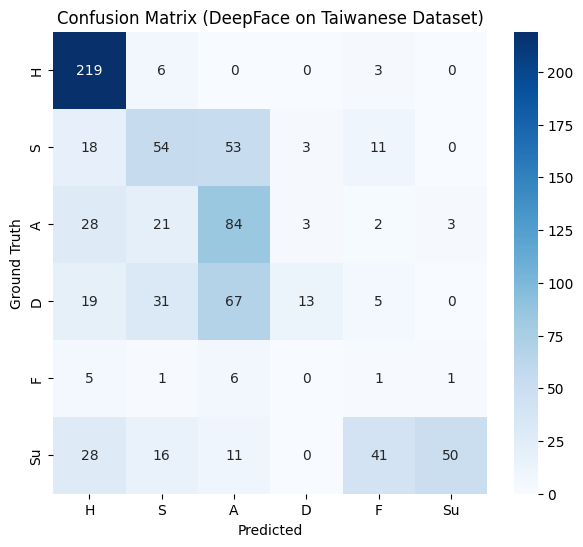

In [9]:
# --- Step 2: 選出成功預測 ---
df_eval = df[df["pred"] > 0]

# --- Step 3: 計算 Accuracy ---
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(df_eval["gt"], df_eval["pred"])
print("Accuracy =", acc)

# --- Step 4: 混淆矩陣 ---
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_eval["gt"], df_eval["pred"])

plt.figure(figsize=(7,6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["H","S","A","D","F","Su"],
    yticklabels=["H","S","A","D","F","Su"]
)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix (DeepFace on Taiwanese Dataset)")
plt.show()


In [12]:
df_eval = df[(df["pred"] > 0)]

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

acc = accuracy_score(df_eval["gt"], df_eval["pred"])
print("Accuracy:", acc)

cm = confusion_matrix(df_eval["gt"], df_eval["pred"])

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["H","S","A","D","F","Su"],
            yticklabels=["H","S","A","D","F","Su"])
plt.title("Confusion Matrix (DeepFace vs Taiwanese Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()


Accuracy: nan


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 700x600 with 0 Axes>